In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import functions
import plot

In [18]:
# LOAD CSV DATA TO DATAFRAME

df = functions.get_data(path="data-sample.csv")

df

,DATE,SOURCE_ID,SOURCE_SIC_CODE,TARGET_ID,TARGET_SIC_CODE
0,20021126,616,J5822,157,C2632
1,20030407,478,J5822,230,J6202
2,20030407,478,J5822,26,G4651
3,20050705,272,J5822,570,C2642
4,20050706,233,J5822,395,J5822
...,...,...,...,...,...
12755,20150424,711,J6202,435,J6202
12756,20150425,242,J6121,138,G4651
12757,20150425,702,J5822,245,F4232
12758,20150425,48,J5822,245,F4232


In [19]:
# PREPARE DATA FROM DATAFRAME

data = functions.prepare_data(df)

In [13]:
# COMPUTE SIMILARITY SCORE MATRIX

m = 2 # neighbor parameters
alpha = 0.001  # influence
gamma = 0.8 # tuning parameter

p_matrix = functions.compute_lp_ats_p_matrix(data, m=m, alpha=alpha, gamma=gamma)

p_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.28989475, 10.38256608,  7.0958562 , ...,  6.6773889 ,
         0.        , 16.41272113],
       [ 3.89635613,  7.6639115 ,  4.08716539, ...,  4.44919891,
         0.        ,  8.60126836],
       [ 4.88659956, 10.67153917,  6.23413329, ...,  5.51459079,
         0.        , 12.36603857]])

In [14]:
# MEASURE RESULT

res = functions.measure_result(data, p_matrix=p_matrix)

res

Result(roc_auc=0.8124725962226508, fpr=array([0.00000000e+00, 1.98564774e-06, 5.02368878e-04, ...,
       7.89678206e-01, 7.89682177e-01, 1.00000000e+00]), tpr=array([0.        , 0.        , 0.        , ..., 0.95679012, 0.95679012,
       1.        ]))

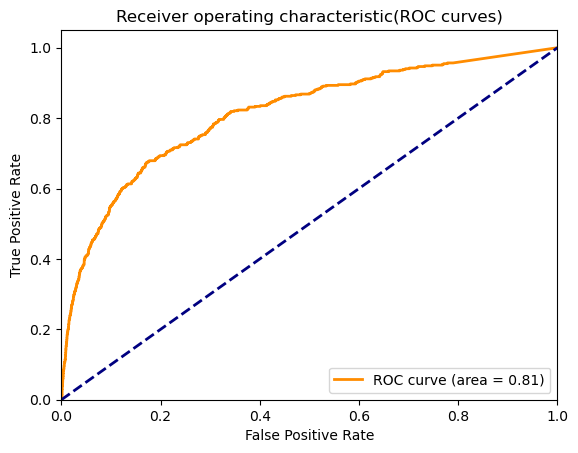

In [21]:
# PLOT RESULT

plot.plot_roc(res.roc_auc, res.fpr, res.tpr)